In [4]:
from numpy import reshape
import seaborn as sns
import pandas as pd  
import torch
from os import listdir, walk
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf
import numpy as np
from IPython.display import display, Audio
import librosa
import random
def ms2samples(time, rate):
    return int((time/1000)*rate)

def samples2ms(sample,rate):
    return int((sample/rate)*1000)
    
def graph_n_play(y,sr):
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()
def linear_n_play(audio_path):
    # y, sr = sf.read(audio_path)
    y, sr = librosa.load(audio_path, sr=None)
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()
def recursive_list_files(path, file_extension=".wav"):
    """Recursively lists all files in a directory and its subdirectories"""
    files = []
    for dirpath, dirnames, filenames in walk(path):
        for filename in filenames:
            if filename.endswith(file_extension):
                files.append(join(dirpath, filename))
    return files

In [ ]:
# 

## Resample

44.1kHz


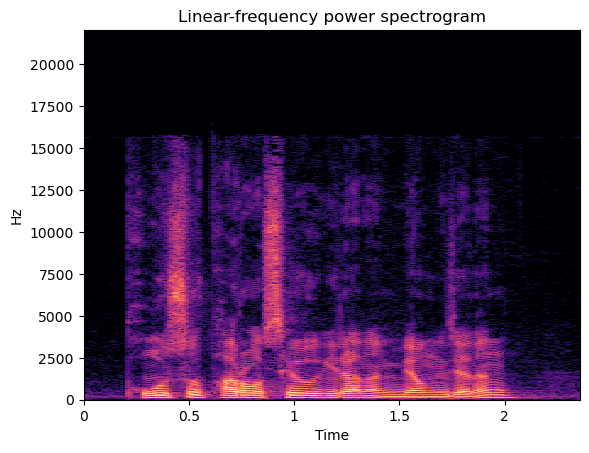

16kHz


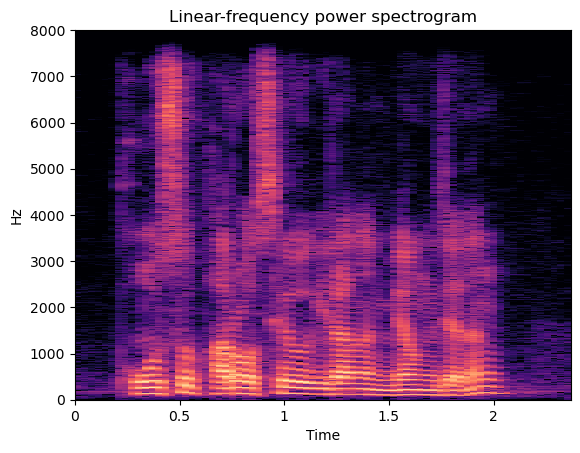

In [9]:
sample = "test/real_son.wav"
print("44.1kHz")
linear_n_play(sample)
y,sr=librosa.load(sample,sr=16000)
print("16kHz")
graph_n_play(y,sr)

## Single channel

In [ ]:
def audio_to_mono(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    y_mono = librosa.to_mono(y)
    return y_mono, sr